In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the CSV file

data = pd.read_csv('/farhana.csv.csv')

In [ ]:
# Display the first few rows of the dataset to understand its structure
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [ ]:
data.shape

(306429, 8)

In [ ]:
# Check Null Values
data.isnull().values.any()

np.True_

In [ ]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 78103 missing values in data frame


In [ ]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [ ]:
len(data.columns)

8

In [ ]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


# Exploratory Data Analysis (EDA) check for missing values, outliers, distributions, and correlations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define columns to plot: exclude categorical columns
numerical_columns = ['SNo', 'Confirmed', 'Deaths', 'Recovered']

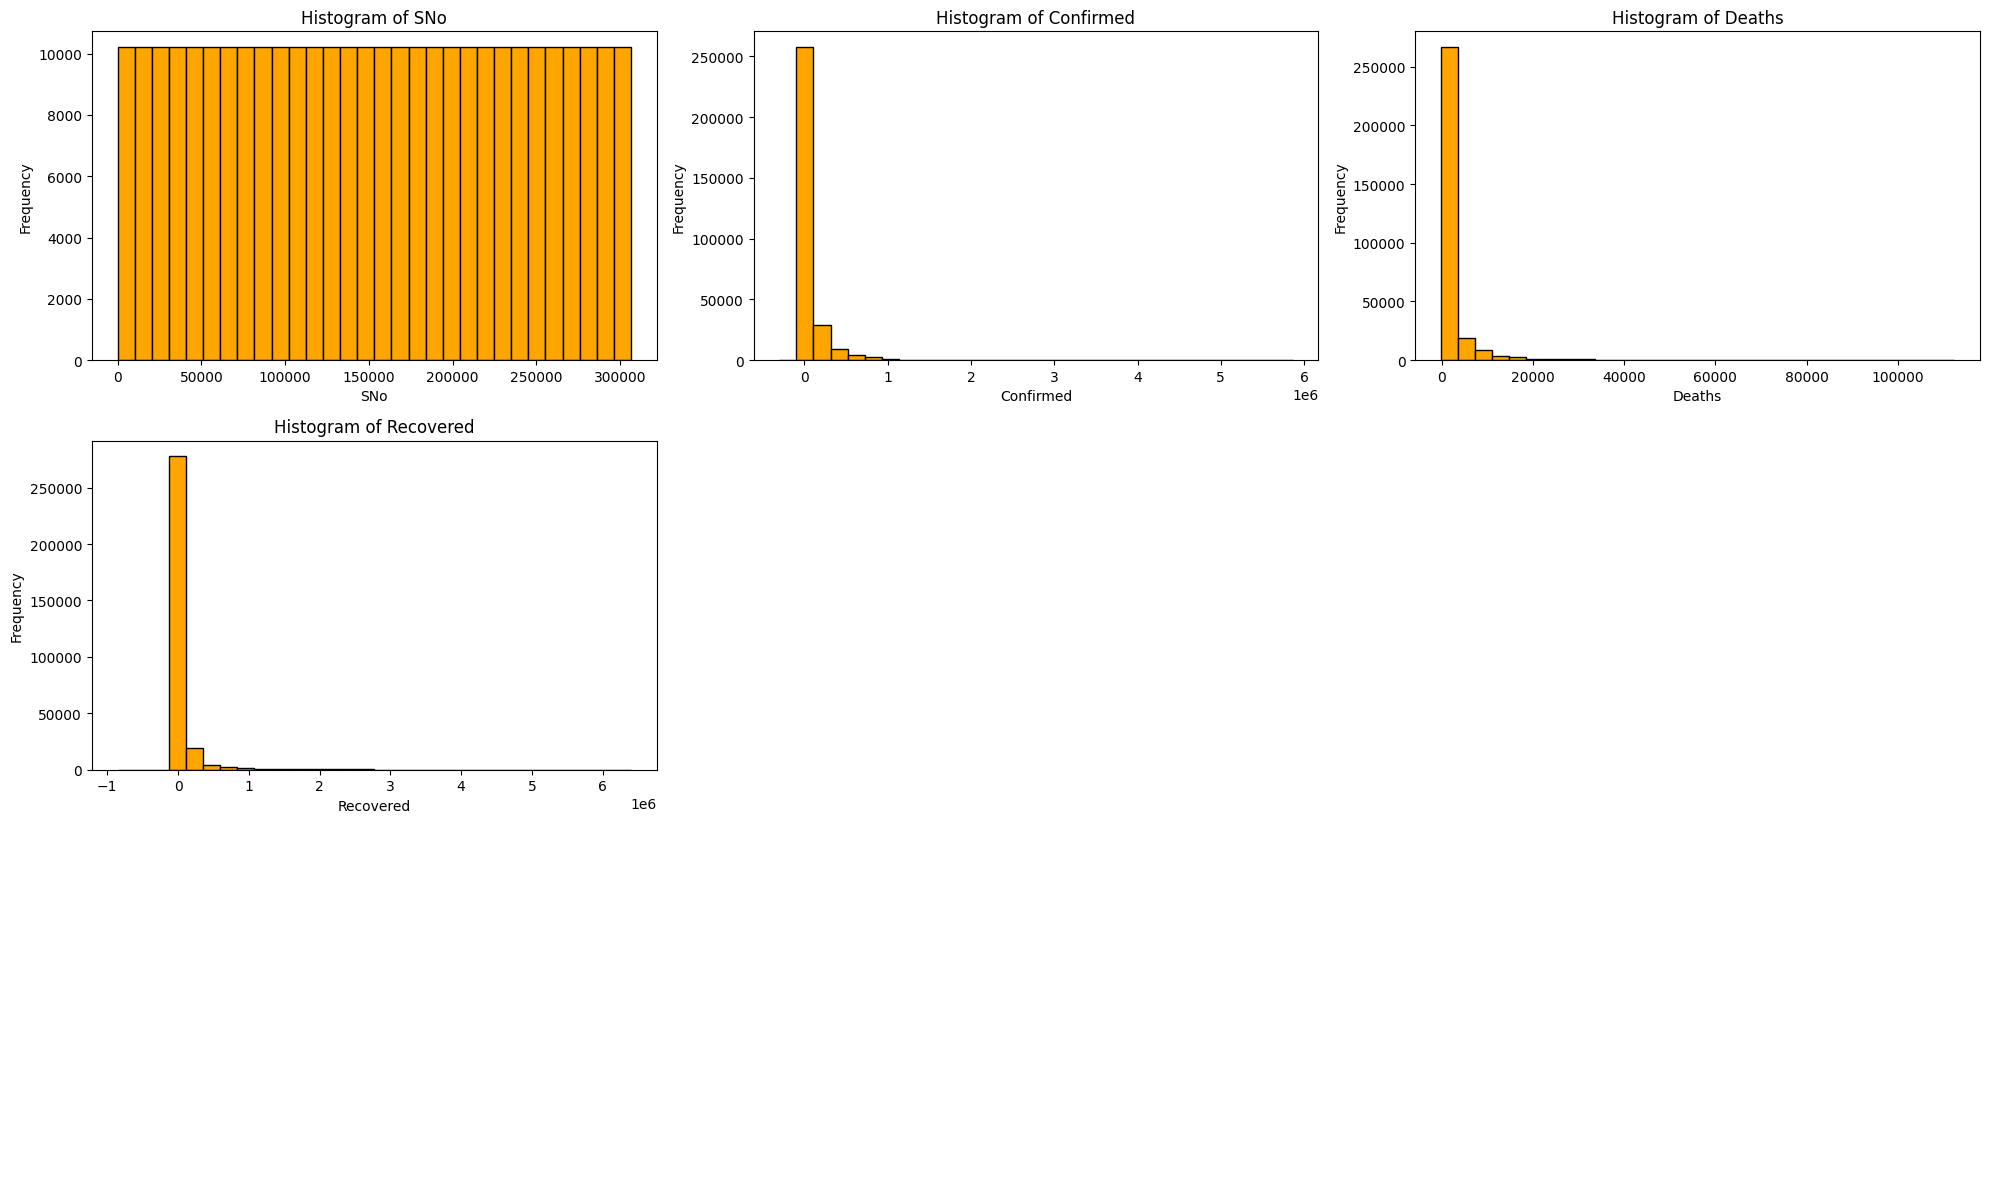

In [ ]:
# Create a 3x3 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through the numerical columns and plot the histograms and column charts
for i, column in enumerate(numerical_columns):
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide unused subplots (since we only have 4 columns)
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


/tmp/ipython-input-4067723995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Country/Region', palette='Set2')


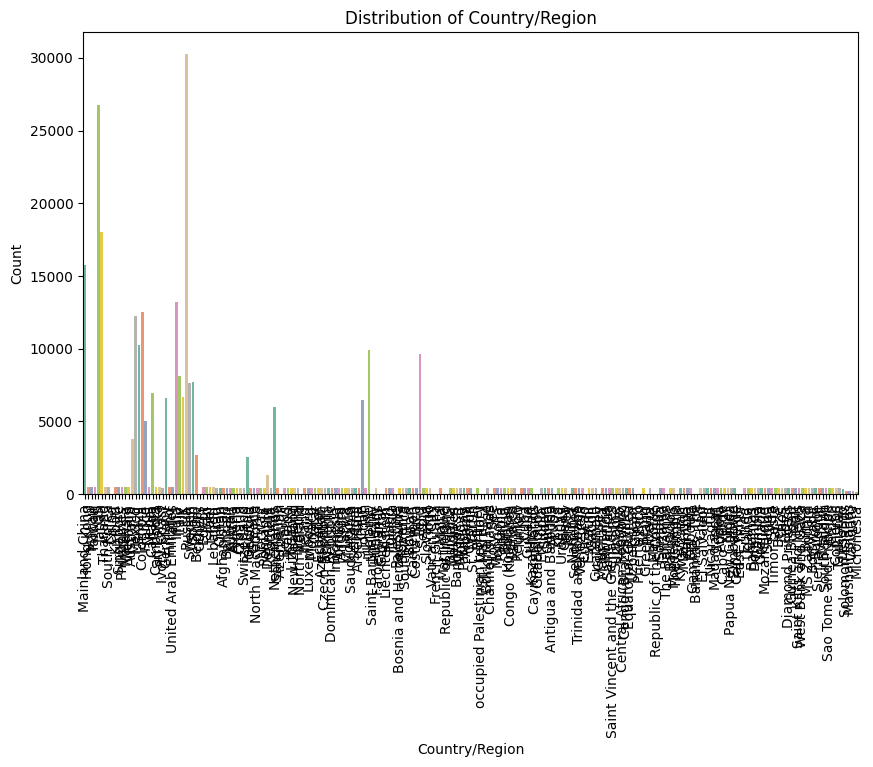

In [ ]:
# Create a histogram for the 'ocean_proximity' variable
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Country/Region', palette='Set2')
plt.title('Distribution of Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

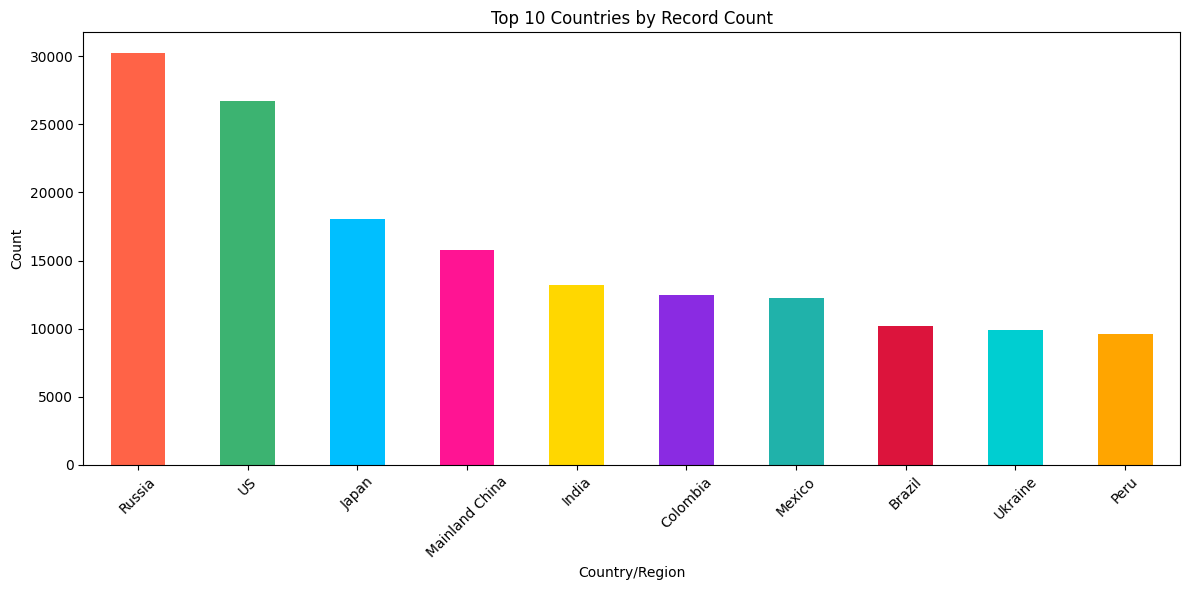

In [ ]:
plt.figure(figsize=(12, 6))

country_counts = data['Country/Region'].value_counts().head(10)  # top 10 countries

country_counts.plot(
    kind='bar',
    color=['#FF6347', '#3CB371', '#00BFFF', '#FF1493', '#FFD700', '#8A2BE2', '#20B2AA', '#DC143C', '#00CED1', '#FFA500']
)

plt.title('Top 10 Countries by Record Count')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

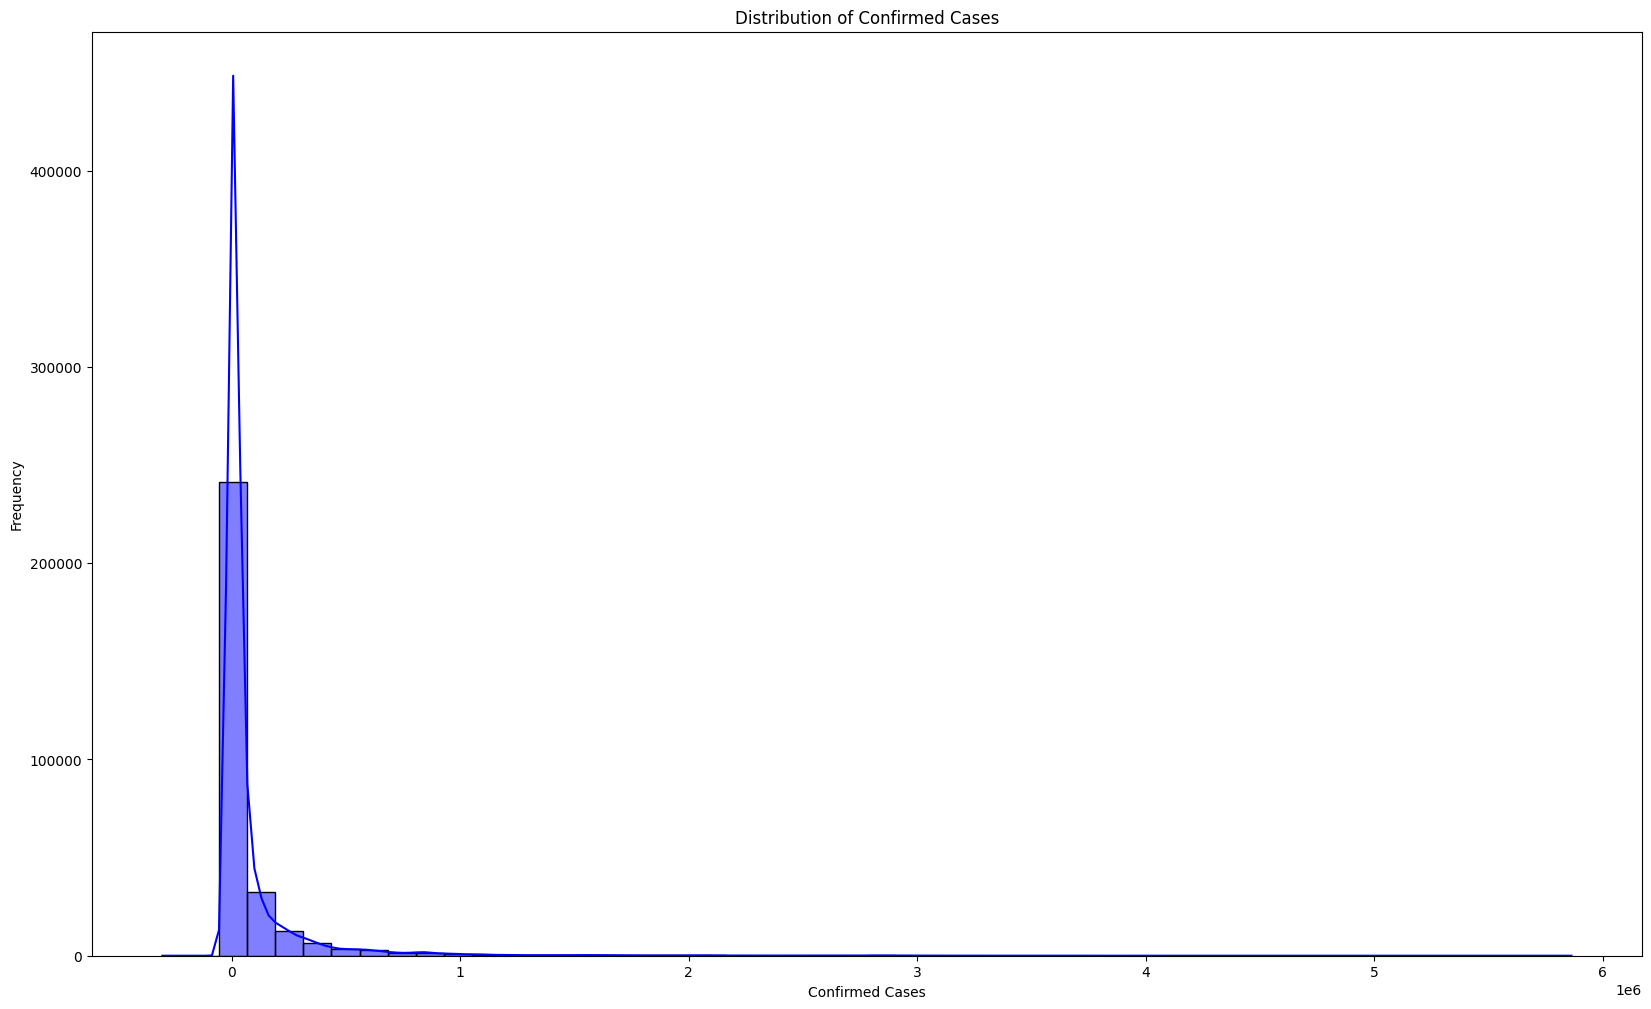

In [ ]:
# Check distribution of the target variable
# Check distribution of Confirmed cases
plt.figure(figsize=(20, 12))
sns.histplot(data['Confirmed'], kde=True, color='blue', bins=50)

plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.show()

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

In [ ]:
correlation_matrix

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.237319,0.197038,0.190511
Confirmed,0.237319,1.000000,0.888416,0.633479
Deaths,0.197038,0.888416,1.000000,0.538416
Recovered,0.190511,0.633479,0.538416,1.000000


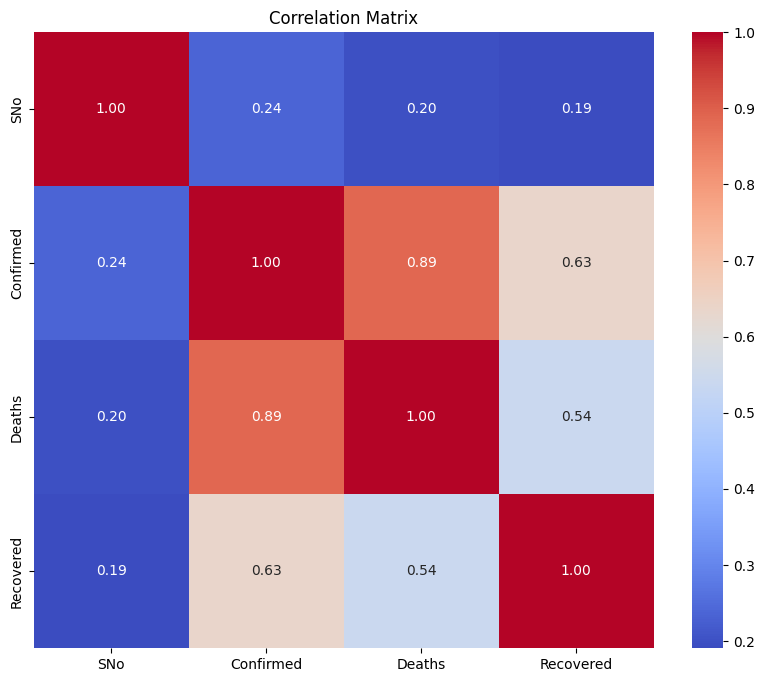

In [ ]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

In [ ]:
missing_values

,0
SNo,0
ObservationDate,0
Province/State,78103
Country/Region,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [ ]:
# Initialize the SimpleImputer with strategy='mean'
from sklearn.impute import SimpleImputer
import pandas as pd

# Select all numeric columns
numeric_cols = ['SNo', 'Confirmed', 'Deaths', 'Recovered']

# Initialize imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numeric columns
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Show updated dataset
print(data.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0  1.0       1/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1  2.0       1/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2  3.0       1/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3  4.0       1/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4  5.0       1/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [ ]:
# Check for any missing values after imputation
data.isnull().sum()

,0
SNo,0
ObservationDate,0
Province/State,78103
Country/Region,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [ ]:
# Initialize OneHotEncoder (using sparse_output=False for dense array)
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Country/Region' column
encoded_country = encoder.fit_transform(data[['Country/Region']])

# Convert encoded array into a DataFrame with proper column names
encoded_country_df = pd.DataFrame(
    encoded_country,
    columns=encoder.get_feature_names_out(['Country/Region'])
)

# Combine with original dataset (optional)
data_encoded = pd.concat([data.reset_index(drop=True), encoded_country_df], axis=1)

# Display encoded dataset
print(data_encoded.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0  1.0       1/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1  2.0       1/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2  3.0       1/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3  4.0       1/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4  5.0       1/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  Country/Region_ Azerbaijan  \
0        1.0     0.0        0.0                         0.0   
1       14.0     0.0        0.0                         0.0   
2        6.0     0.0        0.0                         0.0   
3        1.0     0.0        0.0                         0.0   
4        0.0     0.0        0.0                         0.0   

   Country/Region_('St. Martin',)  ...  Country/Region_Uzbekistan  \
0                             0.0  ...                        0.0   
1                             0.0  ...

In [ ]:
encoded_country

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# If you want to include the encoded categorical column in correlations
# (use sparse_output=False for newer sklearn, or sparse=False for older)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform
encoded = encoder.fit_transform(data[['Country/Region']])

# Create DataFrame from encoded data
encoded_df = pd.DataFrame(
    encoded,
    index=data.index,
    columns=encoder.get_feature_names_out(['Country/Region'])
)

# Combine with numeric columns
numeric_data = data.select_dtypes(include=['number'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

# Calculate correlations
correlation_matrix = all_data.corr(numeric_only=True)

# Display correlation matrix
print(correlation_matrix.head())

                                 SNo  Confirmed    Deaths  Recovered  \
SNo                         1.000000   0.237319  0.197038   0.190511   
Confirmed                   0.237319   1.000000  0.888416   0.633479   
Deaths                      0.197038   0.888416  1.000000   0.538416   
Recovered                   0.190511   0.633479  0.538416   1.000000   
Country/Region_ Azerbaijan -0.003073  -0.000558 -0.000574  -0.000452   

                            Country/Region_ Azerbaijan  \
SNo                                          -0.003073   
Confirmed                                    -0.000558   
Deaths                                       -0.000574   
Recovered                                    -0.000452   
Country/Region_ Azerbaijan                    1.000000   

                            Country/Region_('St. Martin',)  \
SNo                                              -0.003032   
Confirmed                                        -0.000558   
Deaths                          

In [ ]:
# Check Null Values
all_data.isnull().values.any()

np.False_

In [ ]:
# Check for missing values
missing_values = all_data.isnull().sum()

In [ ]:
missing_values

,0
SNo,0
Confirmed,0
Deaths,0
Recovered,0
Country/Region_ Azerbaijan,0
...,...
Country/Region_West Bank and Gaza,0
Country/Region_Yemen,0
Country/Region_Zambia,0
Country/Region_Zimbabwe,0


In [ ]:
all_data.shape

(306429, 233)

In [ ]:
len(all_data.columns)

233

In [ ]:
all_data.describe()

,SNo,Confirmed,Deaths,Recovered,Country/Region_ Azerbaijan,"Country/Region_('St. Martin',)",Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,...,Country/Region_Uzbekistan,Country/Region_Vanuatu,Country/Region_Vatican City,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe,Country/Region_occupied Palestinian territory
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05,306429.000000,306429.000000,306429.000000,306429.000000,306429.000000,306429.000000,...,306429.000000,306429.000000,306429.000000,306429.000000,306429.000000,306429.000000,306429.000000,306429.000000,306429.000000,306429.000000
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04,0.000003,0.000003,0.001504,0.001459,0.001501,0.001482,...,0.001439,0.000656,0.000013,0.001442,0.001609,0.001403,0.001354,0.001429,0.001423,0.000023
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05,0.001806,0.001806,0.038758,0.038166,0.038716,0.038463,...,0.037909,0.025603,0.003613,0.037952,0.040078,0.037434,0.036776,0.037780,0.037694,0.004779
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
correlation_matrix

,SNo,Confirmed,Deaths,Recovered,Country/Region_ Azerbaijan,"Country/Region_('St. Martin',)",Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,...,Country/Region_Uzbekistan,Country/Region_Vanuatu,Country/Region_Vatican City,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe,Country/Region_occupied Palestinian territory
SNo,1.000000,0.237319,0.197038,0.190511,-0.003073,-0.003032,-0.007780,-0.005870,-0.007645,-0.006827,...,-0.004975,0.022051,-0.006086,-0.005112,-0.011940,-0.003455,-0.001382,-0.004559,-0.004282,-0.007973
Confirmed,0.237319,1.000000,0.888416,0.633479,-0.000558,-0.000558,-0.006816,-0.005707,-0.003561,-0.011162,...,-0.004830,-0.007908,-0.001115,-0.000591,-0.012210,0.001564,-0.011059,-0.007479,-0.009629,-0.001475
Deaths,0.197038,0.888416,1.000000,0.538416,-0.000574,-0.000574,-0.003542,-0.007127,-0.001345,-0.011811,...,-0.009776,-0.008137,-0.001148,-0.007421,-0.012621,-0.005919,-0.008409,-0.009242,-0.008787,-0.001518
Recovered,0.190511,0.633479,0.538416,1.000000,-0.000452,-0.000452,-0.004086,-0.003646,-0.001771,-0.008728,...,-0.000512,-0.006410,-0.000904,0.004468,-0.009848,0.006629,-0.008991,-0.004054,-0.007041,-0.001196
Country/Region_ Azerbaijan,-0.003073,-0.000558,-0.000574,-0.000452,1.000000,-0.000003,-0.000070,-0.000069,-0.000070,-0.000070,...,-0.000069,-0.000046,-0.000007,-0.000069,-0.000073,-0.000068,-0.000067,-0.000068,-0.000068,-0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country/Region_West Bank and Gaza,-0.003455,0.001564,-0.005919,0.006629,-0.000068,-0.000068,-0.001455,-0.001433,-0.001453,-0.001444,...,-0.001423,-0.000960,-0.000135,-0.001425,-0.001505,1.000000,-0.001380,-0.001418,-0.001415,-0.000179
Country/Region_Yemen,-0.001382,-0.011059,-0.008409,-0.008991,-0.000067,-0.000067,-0.001429,-0.001408,-0.001428,-0.001419,...,-0.001398,-0.000943,-0.000133,-0.001400,-0.001478,-0.001380,1.000000,-0.001393,-0.001390,-0.000176
Country/Region_Zambia,-0.004559,-0.007479,-0.009242,-0.004054,-0.000068,-0.000068,-0.001469,-0.001446,-0.001467,-0.001457,...,-0.001436,-0.000969,-0.000137,-0.001438,-0.001519,-0.001418,-0.001393,1.000000,-0.001428,-0.000181
Country/Region_Zimbabwe,-0.004282,-0.009629,-0.008787,-0.007041,-0.000068,-0.000068,-0.001465,-0.001443,-0.001464,-0.001454,...,-0.001433,-0.000967,-0.000136,-0.001435,-0.001515,-0.001415,-0.001390,-0.001428,1.000000,-0.000180


In [ ]:
# Export DataFrame to CSV
all_data.to_csv('cdata.csv', index=False)  # index=False prevents pandas from writing row indices

In [ ]:
# Step 3: Prepare the features (X) and target (y)

# Target variable
y = all_data['Confirmed']

# Features (everything else except the target)
X = all_data.drop(columns=['Confirmed'])

print("Feature columns:", X.columns.tolist())
print("\nTarget variable: Confirmed")

Feature columns: ['SNo', 'Deaths', 'Recovered', 'Country/Region_ Azerbaijan', "Country/Region_('St. Martin',)", 'Country/Region_Afghanistan', 'Country/Region_Albania', 'Country/Region_Algeria', 'Country/Region_Andorra', 'Country/Region_Angola', 'Country/Region_Antigua and Barbuda', 'Country/Region_Argentina', 'Country/Region_Armenia', 'Country/Region_Aruba', 'Country/Region_Australia', 'Country/Region_Austria', 'Country/Region_Azerbaijan', 'Country/Region_Bahamas', 'Country/Region_Bahamas, The', 'Country/Region_Bahrain', 'Country/Region_Bangladesh', 'Country/Region_Barbados', 'Country/Region_Belarus', 'Country/Region_Belgium', 'Country/Region_Belize', 'Country/Region_Benin', 'Country/Region_Bhutan', 'Country/Region_Bolivia', 'Country/Region_Bosnia and Herzegovina', 'Country/Region_Botswana', 'Country/Region_Brazil', 'Country/Region_Brunei', 'Country/Region_Bulgaria', 'Country/Region_Burkina Faso', 'Country/Region_Burma', 'Country/Region_Burundi', 'Country/Region_Cabo Verde', 'Country/R

In [ ]:
# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Apply Random Forest Regressor for prediction
model = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    min_samples_leaf=5,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42,
    bootstrap=True,
    verbose=1
)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   45.8s finished


RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=5,
                      n_estimators=150, n_jobs=-1, random_state=42, verbose=1)

In [ ]:
# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.8s finished


In [ ]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2 Score: {r2:.4f}")

MAE: 85368.7454
MSE: 75055808340.2826
RMSE: 273963.1514
MAPE: 2046591796224733440.0000
R2 Score: -0.0432
